# "ИГРОТЕКА"

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
from math import sqrt
from copy import deepcopy
import seaborn as sns

## Загрузка данных

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
    
    pd.options.display.max_colwidth = 150

## Знакомство с данными

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В таблице видно что есть пропуски (NaN), названия столбцов нужно привести к одному регистру.

### Описание данных

**Name** — название игры  
**Platform** — платформа  
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** — продажи в Европе (миллионы проданных копий)  
**JP_sales** — продажи в Японии (миллионы проданных копий)  
**Other_sales** — продажи в других странах (миллионы проданных копий)  
**Critic_Score** — оценка критиков (максимум 100)  
**User_Score** — оценка пользователей (максимум 10)  
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица содержит 11 колонок из них 6 колонок типа *float64*, 5 колонок типа *object*, 16715 строк.  
  
Заменить тип данных столбца *Critic_Score* на *int*, столбец *User_Score* имеет тип данных *object* преобразуем в *float*, для удобства в исследовании.  

## Предобработка данных

### Названия столбцов

Приведём названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### *tbd*

Сокращение TBD — это аббревиатура, часто используемая в различных областях, таких как бизнес, технологии, наука и т.д. TBD — это английский акроним «To Be Determined», что в переводе означает «будет определено». Это означает, что решение по конкретному вопросу еще не было принято.

Сокращение TBD используется в различных ситуациях, когда необходимо показать, что решение по данному вопросу еще не было принято, или точные детали еще не уточнены. Это может быть использовано на встречах, на конференциях или в проектных документах.

В то же время TBD может вызывать путаницу и недопонимание, поэтому, прежде чем использовать это сокращение, уточните, знакомы ли ваши собеседники с данным термином. Если вы все же решили использовать TBD, убедитесь, что контекст ясен и понятен всем участникам общения.  
  
  Источник: https://psk-group.su/znacheniya/cto-oznacaet-sokrashhenie-tbd

Аббревиатуру *tbd* заменю на *NaN*, т.к. она означает, недостаточное количество оценок для выставления общей.

Проверим уникальные значения нашей таблицы и найдём где у нас есть значения *tbd*. Ещё посчитаем количество *NaN* в каждом столбце.

In [6]:
# Создание общей функции для вывода уникальных значений по каждому столбцу
def uniq_columns(data_frame):  
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
        print('Количество NAN столбца', column)
        print(data_frame[column].isna().sum())

In [7]:
uniq_columns(data)

Уникальные значения столбца name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Количество NAN столбца name
2
Уникальные значения столбца platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Количество NAN столбца platform
0
Уникальные значения столбца year_of_release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Количество NAN столбца year_of_release
269
Уникальные значения столбца genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Количество NAN столбца genre
2
Уникальные значения с

*tbd* нашлось только в столбце *user_score*

In [8]:
# Меняем tbd на NaN
data['user_score']=data['user_score'].replace({'tbd':np.NaN})
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

### ПРОПУСКИ

Следующие столбцы содержат *NaN*:  
- *name*  
- *year_of_release*  
- *genre*  
- *critic_score*  
- *user_score*  
- *rating*  

#### Одинаковые строчки с пропусками в **name** и **genre**.

In [9]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Считаю, что можно удалить эти строки, т.к. их всего 2 и данные в них не подлежат восстановлению.

In [10]:
data = data.dropna(subset = ['name'])

#### Пропуски в столбце *year_of_release*

In [11]:
data['year_of_release'].isna().sum()

269

In [12]:
'{:.1%}'.format((data[data['year_of_release'].isna()].shape[0]/data['year_of_release'].shape[0]))

'1.6%'

1.6 % данных в которых не указан год, эти игры для анализа нам не нужны и учитывая их малый процент, считаю можно их удалить. Можно было бы восстановить год по указанному значению в названии игры, но не в каждом жанре в названии игры указывается именно год выпуска, считаю это нецелесообразным.

In [13]:
data = data[data['year_of_release'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Замена типа данных

In [14]:
data = data.astype({"critic_score": "Int64"}) 
data = data.astype({"user_score": "float64"})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


#### Удаление дубликатов

In [15]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Дубликаты отсутствуют.

In [16]:
dubll = data[data.duplicated(subset=['name','platform', 'year_of_release'], keep=False)]
dubll

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83,5.5,E


In [17]:
data.drop_duplicates(subset=['name','platform', 'year_of_release'], keep=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Дубликат удалён.

#### Cуммарные продажи

Добавление столбца *total_sales* - общая сумма продаж игры.

In [18]:
data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


**ВЫВОД**  
  
Исправлены названия столбцов, приведены к нижнему регистру.  
Дублиактов не обнаружено, удалены 2 строки не поддающиеся восстановлению, а так же 1,6% данных которые не подходят для исследования по причине отсутствия года выпуска.  
Заменены типы данных для столбцов необходимых для дальнейшей работы.  
Аббревиатура *tbd* заменена на *NaN*, т.к. она означает, недостаточное количество оценок для выставления общей.  
Создан столбец *total_sales*.

Причинами появления пропусков в данных могут быть: неверный ввод данных, сокрытие информации, повреждение файла данных при сохранении, технические проблемы.

## Исследовательский анализ

### Cколько игр выпускалось в разные годы.  
Важны ли данные за все периоды?

In [19]:
# Составление таблицы с количеством выпускаемых игр по каждому году.
data_years = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
data_years.columns = ['games']
data_years

,games
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


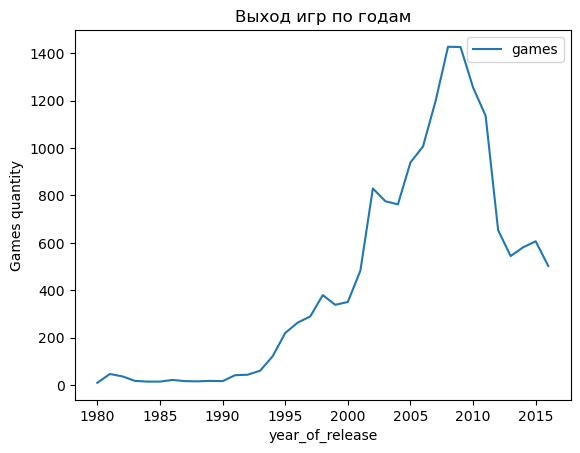

In [20]:
data_years.plot()
plt.title('Выход игр по годам')
plt.ylabel("Games quantity");

Малое количество игр выпсукалось вплоть до 1995 года, далее идет подёъем.  
В 2010 году пошло на спад, но игр выпсукалось досаточное количество.  
На мой взгляд данные до 1955 включительно не важны.

### Продажи по платформам

Посмотрите, как менялись продажи по платформам.  
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.  
За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
# Для ответа на вопрос составим таблицу с общей суммой продаж по каждой платформе.
data_sales = pd.pivot_table(data, index=['platform'], values='total_sales', aggfunc='sum')
data_sales = data_sales.sort_values('total_sales',ascending=False)
data_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


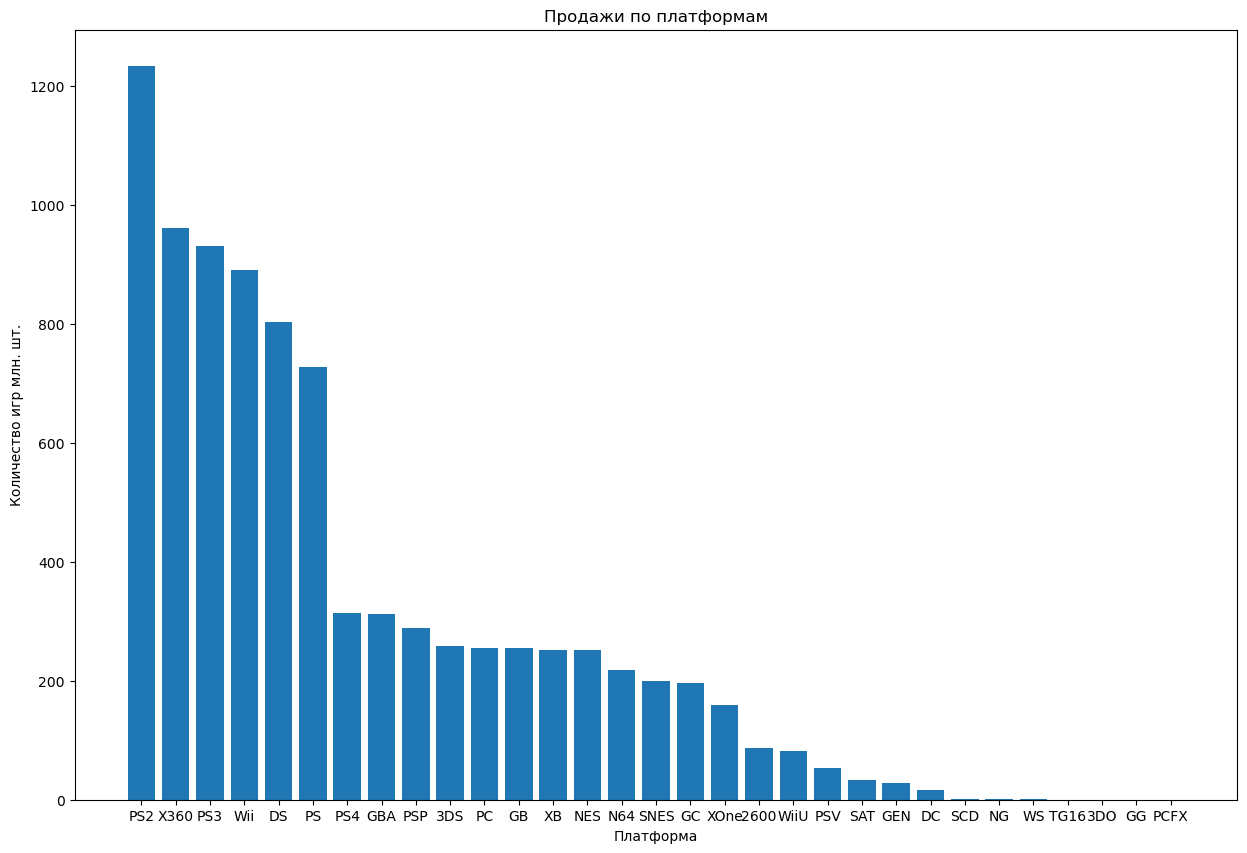

In [22]:
plt.figure(figsize=(15,10))
plt.bar(data_sales.index, data_sales['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel("Платформа");
plt.ylabel("Количество игр млн. шт.");

In [23]:
# Выберем топ 6 платформ
top_platform = list(data_sales.index[:6])
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

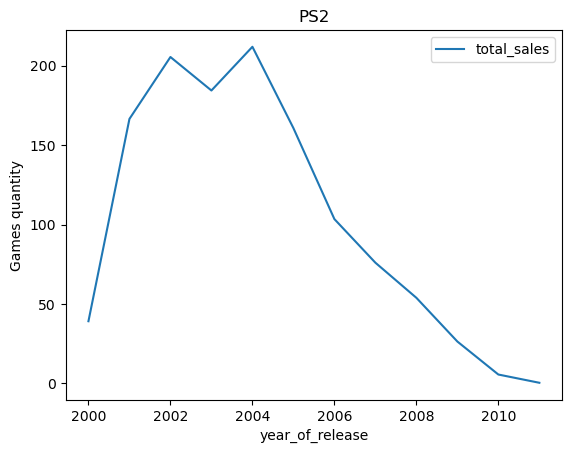

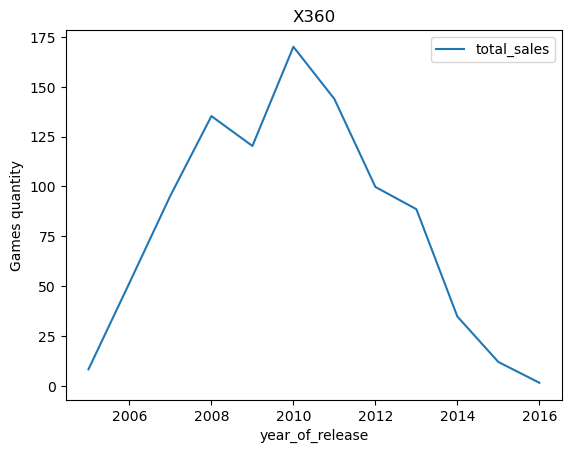

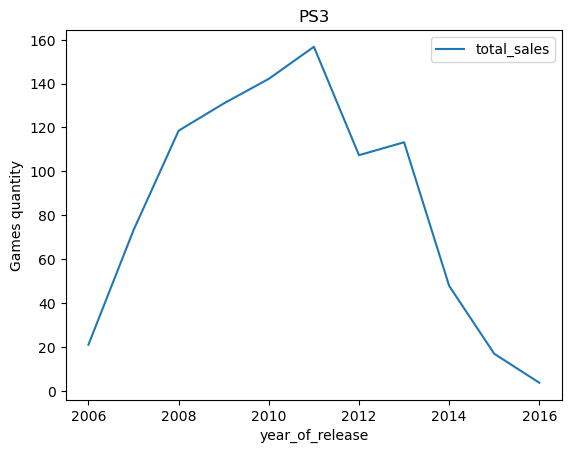

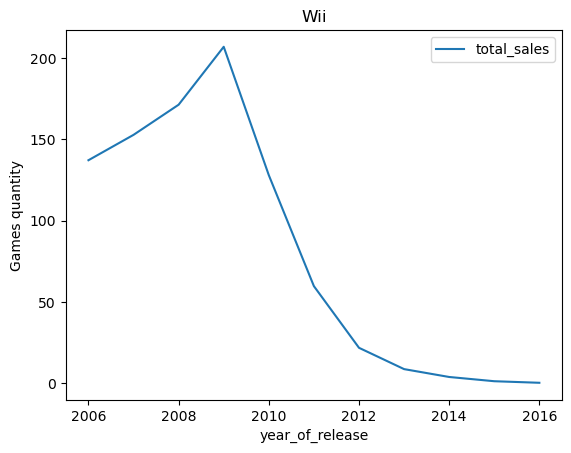

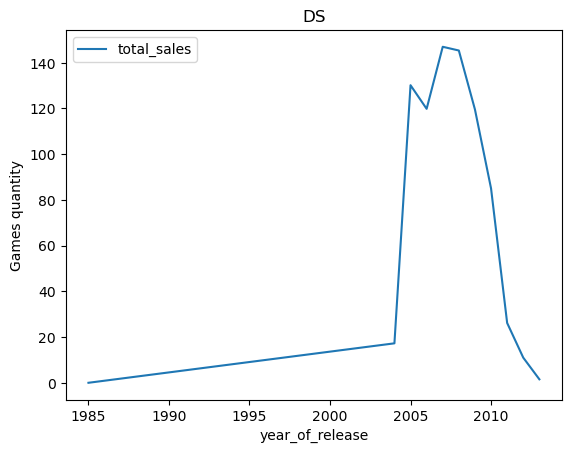

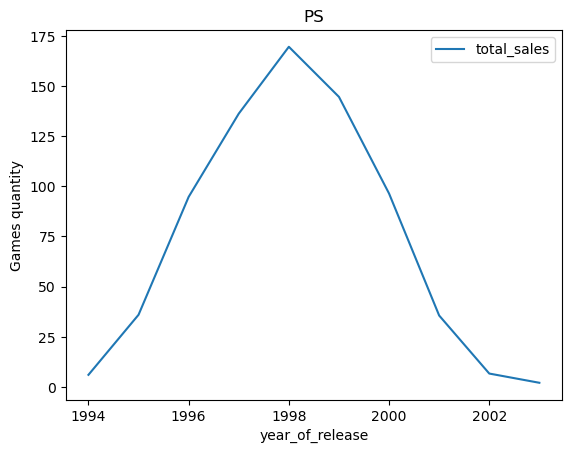

In [24]:
# Посмотрим графики топ 6 платформ
for platform in top_platform:
    platform_sales = pd.pivot_table(data.query('platform == @platform'), index=['year_of_release'], values='total_sales', aggfunc='sum')
    platform_sales.plot()
    plt.ylabel("Games quantity");
    plt.title(platform)

На этапе построения графиков выяснилось, что одна игра для *Nintendo_DS* вышла раньше выхода консоли.  
Исправим и вернем актуальное значение.

In [25]:
Nintendo_DS = data.loc[(data['platform'] == "DS") & (data['year_of_release'] < 2004)]
Nintendo_DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


In [26]:
data.loc[data['name']=='Strongest Tokyo University Shogi DS', 'year_of_release']=2010
data.loc[data['name']=='Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2010.0,Action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


Год исправлен.

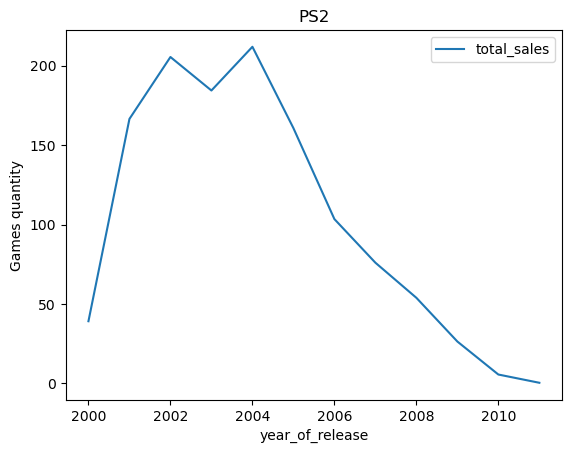

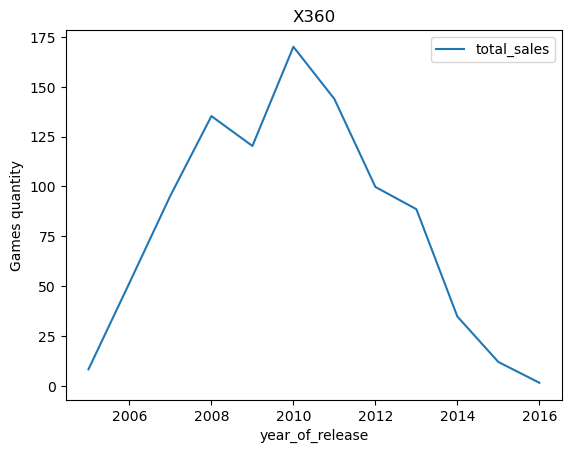

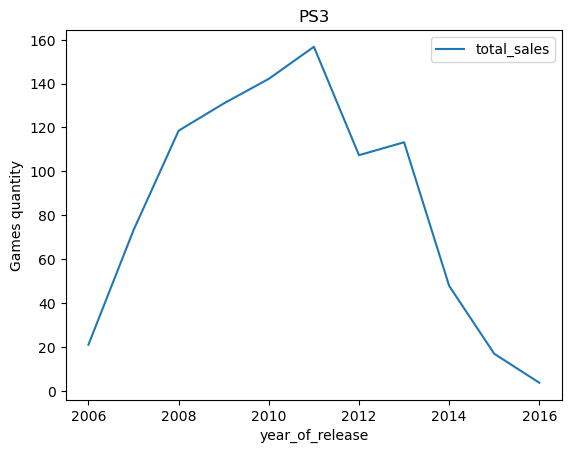

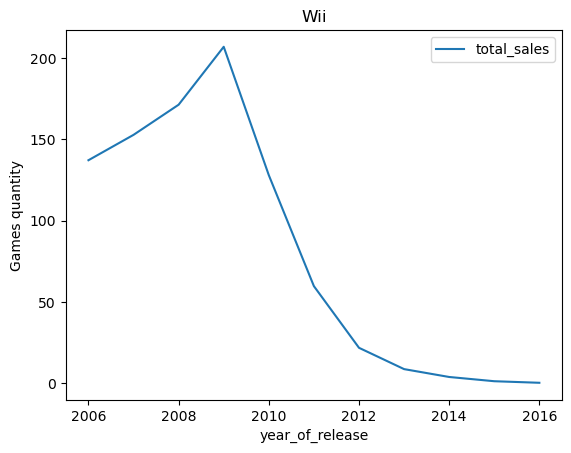

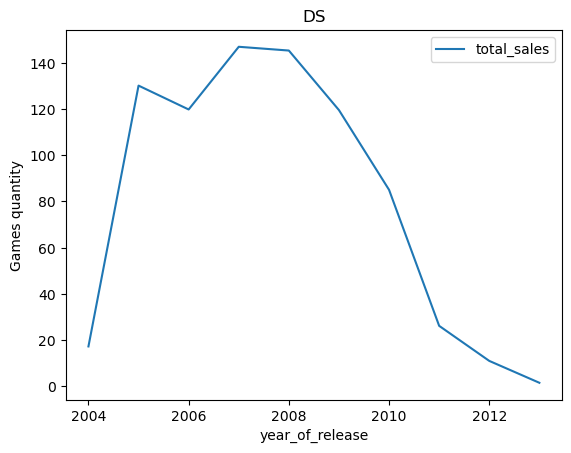

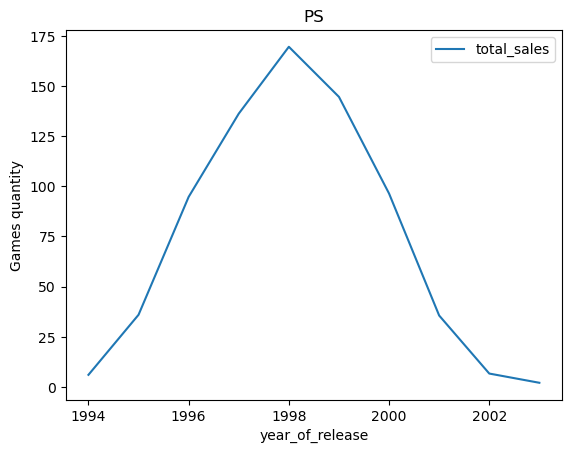

In [27]:
# Посмотрим снова графики топ 6 платформ
for platform in top_platform:
    platform_sales = pd.pivot_table(data.query('platform == @platform'), index=['year_of_release'], values='total_sales', aggfunc='sum')
    platform_sales.plot()
    plt.ylabel("Games quantity");
    plt.title(platform)

На основе таблицы было выделено 6 топ платформ:  
- *PS2* - 1233.56  
- *X360* - 961.24  
- *PS3* - 931.34  
- *Wii* - 891.18  
- *DS* - 802.78  
- *PS* - 727.58  
Следующие платформы сильно отстают по продажам например: *PS4* - 314.14

Построим гистограммы по основным производителям *SONY* и *MICROSOFT*.

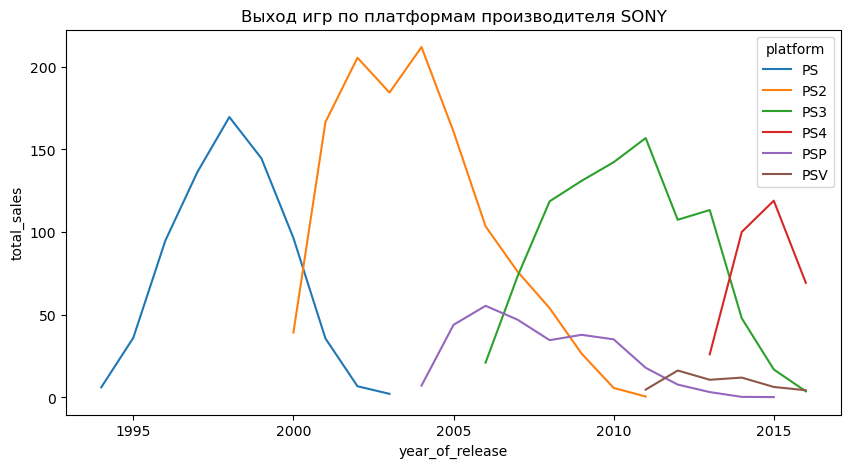

In [28]:
# SONY
ps_list = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
ps_salles = pd.DataFrame(data.query('platform in @ps_list'))

ps_salles_all = ps_salles.groupby(['platform', 'year_of_release'])[['total_sales']].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x='year_of_release',y='total_sales', hue='platform', data=ps_salles_all.reset_index())
plt.title('Выход игр по платформам производителя SONY');

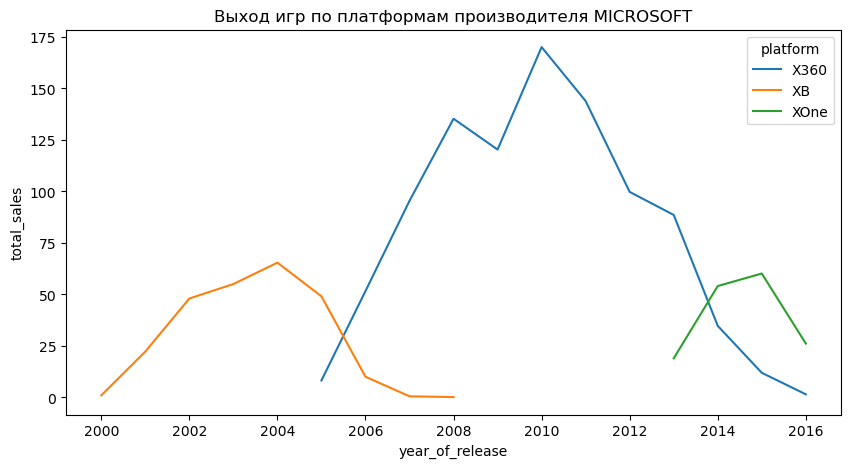

In [29]:
# MICROSOFT
xbox_list = ['X360', 'XB', 'XOne']
xbox_salles = pd.DataFrame(data.query('platform in @xbox_list'))

xbox_salles_all = xbox_salles.groupby(['platform', 'year_of_release'])[['total_sales']].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x='year_of_release',y='total_sales', hue='platform', data=xbox_salles_all.reset_index())
plt.title('Выход игр по платформам производителя MICROSOFT');

**ВЫВОД**  
  
**PS2**. Резкий скачок продаж наблюдается с 2000 по 2002 гг. В 2004 год пик, Затем продажи постепенно падают, это от части связано с тем, что в 2006 году вышла *PS3*, но даже не смотря на это продажи продолжались, наверняка с выходом новой консоли старая стала стоить дешевле, а поддержка старой версии от разработчиков еще была.  
  
**X360**. 2005-2008 продажи расли, пик был достигнут в 2010 году после спада продаж в 2009, вероятно подъем связан в выходом популярных игр. 
  
**PS3**. Рост продаж с 2006 по 2011 гг. Затем стали падать с небольшим плато в районе 2012-2013 годов.  
  
**Wii**. Высокий старт продаж среди других платформ. Несмотря на медленный рост с 2006 по 2009 гг по пиковой сумме опередила некоторые другие платформы. Затем продажи стали резко падать. Наверняка это связано с отсутствием выхода популярных игр.  
  
**Nintendo DS**. Резкий рост продаж с 2004 по 2005 года. Далее медленный рост до 2008 года, после которого начался постепенный спад продаж.  
  
**PS**. Иммет стабильно постепенный рост в 1994 - 1998 гг и затем зеркальный спад.  
  
По всем платформам наблюдается тенденция резких стартов продаж, затем паение после выхода консоли нового поколения, но вместе с этим выгода купить старую модель плюс поддержка старых моделей разработчиками помогает добиться плавности спада продаж.  
  
Новые консоли *PS* примерно раз в 5 лет. *Xbox* выходят с периодом от 5 до 8 лет. Cреднее время появления консолей нового поколения в среднем составляет 6 лет.

### Актуальный период

Возьмите данные за соответствующий актуальный период.  
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.  
Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальный период на мой взгляд будет с 2014 года, так как появились крайние передовые консоли *PS4* и *Xbox One*.

In [30]:
data_current = data[data['year_of_release'] > 2013]
data_current.info()
data_current.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98


### Лидеры продаж

Какие платформы лидируют по продажам, растут или падают?  
Выберите несколько потенциально прибыльных платформ.

In [31]:
data_current_sales = pd.pivot_table(data_current, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
data_current_sales 

total_sales
platform year_of_release             
3DS      2014.0                 43.76
         2015.0                 27.78
         2016.0                 15.14
PC       2014.0                 13.28
         2015.0                  8.52
         2016.0                  5.25
PS3      2014.0                 47.76
         2015.0                 16.82
         2016.0                  3.60
PS4      2014.0                100.00
         2015.0                118.90
         2016.0                 69.25
PSP      2014.0                  0.24
         2015.0                  0.12
PSV      2014.0                 11.90
         2015.0                  6.25
         2016.0                  4.25
Wii      2014.0                  3.75
         2015.0                  1.14
         2016.0                  0.18
WiiU     2014.0                 22.03
         2015.0                 16.35
         2016.0                  4.60
X360     2014.0                 34.74
         2015.0                 11.96
         2016.0                  1.52
XOne     2014.0                 54.07
         2015.0                 60.14
         2016.0                 26.15

In [32]:
# Посмотрим общие продажи по платформам
data_current_platform = pd.pivot_table(data_current, index='platform', values='total_sales', aggfunc = 'sum')
data_current_platform.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Почти у всех консолей продажи падают после 2014 года.  
  
Лидер продаж *PS4*, хотя в предверии появления *PS5* продажи падают, но всё равно платформа прибыльная. Также и *XOne*, несмотря на то, что продаж меньше в 2 раза.  
  
*Nintendo 3DS* имеет третье место по продажам за актуальный период. Это портативная консоль, а конкуренты такие как *PSP*, *PSV*, *WiiU* имеют горазда меньшие продажи, поэтому считаю платформу прибыльной.  
  
Продажи на консолях *PS3*, *X360*, *Wii* в конце актуального периода снизились до минимума. Данные консоли уже не актуальны соотвественно, не прибыльны.  
  
Продажи игр на *PC* довольно тяжело оценить, ведь PC можно модернизировать во время использования и сделать актуальным, несмотря на это имеет низкие продажи. Но на мой взгляд эта платформа всегда будет актуальна.

### График «ящик с усами»

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
Опишите результат.

In [33]:
# Посмотрим общий список продаж по платформам
data_current_sales = pd.pivot_table(data_current, index=['platform'], 
                                     values='total_sales', aggfunc = 'sum')
data_current_sales.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Лидируют в общем списке *PS4* и *XOne*, замыкают список *Wii* и *PSP*.

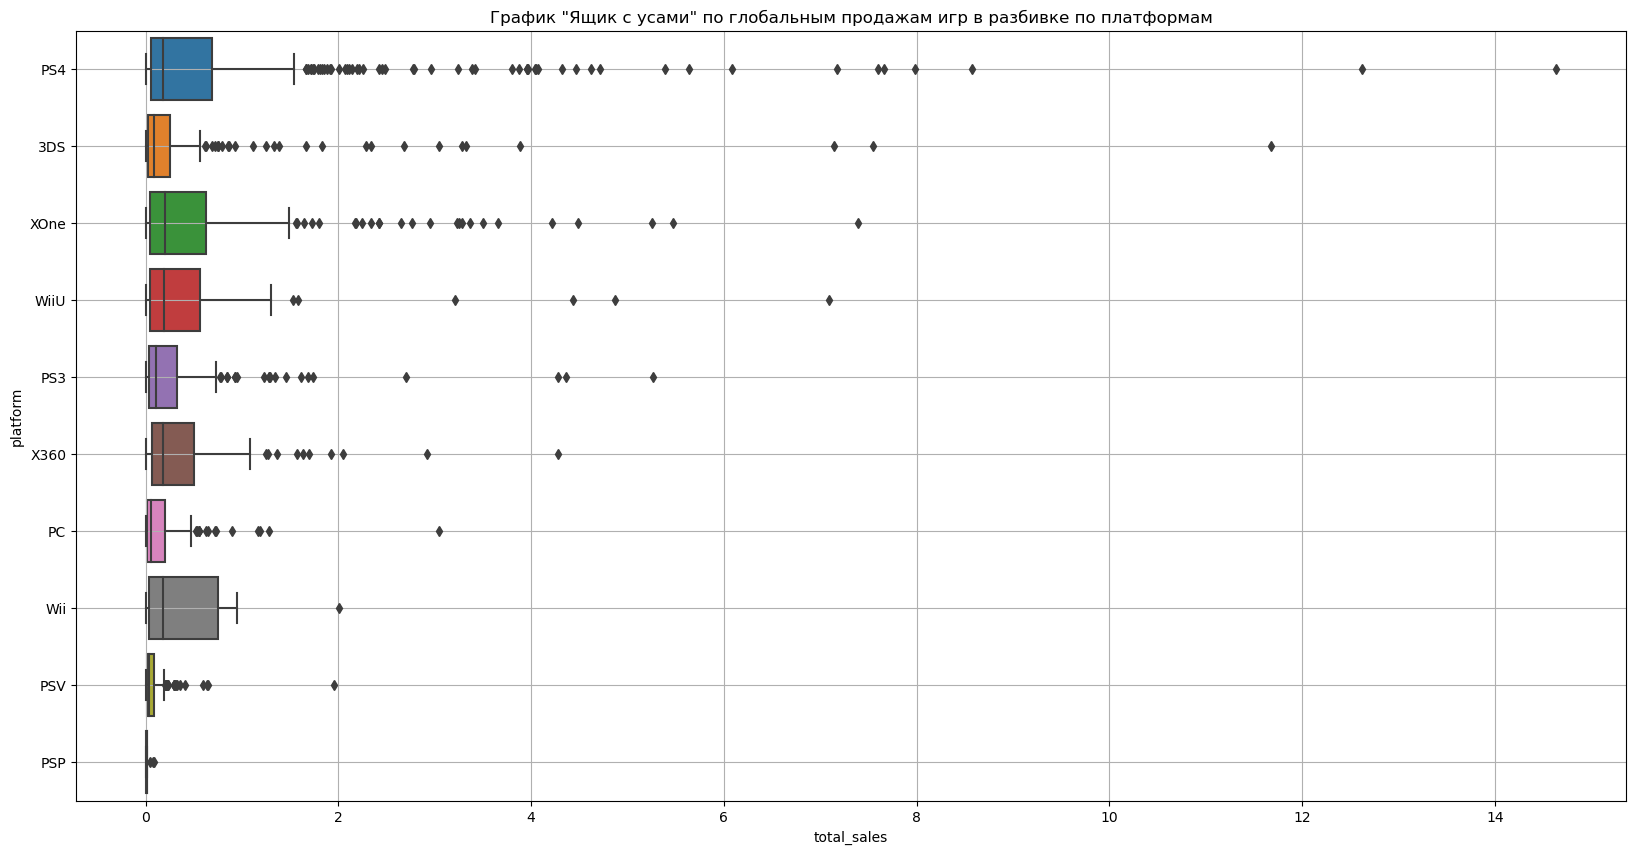

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x="total_sales", y="platform", data= data_current.reset_index())
plt.title('График "Ящик с усами" по глобальным продажам игр в разбивке по платформам')
plt.grid(True);

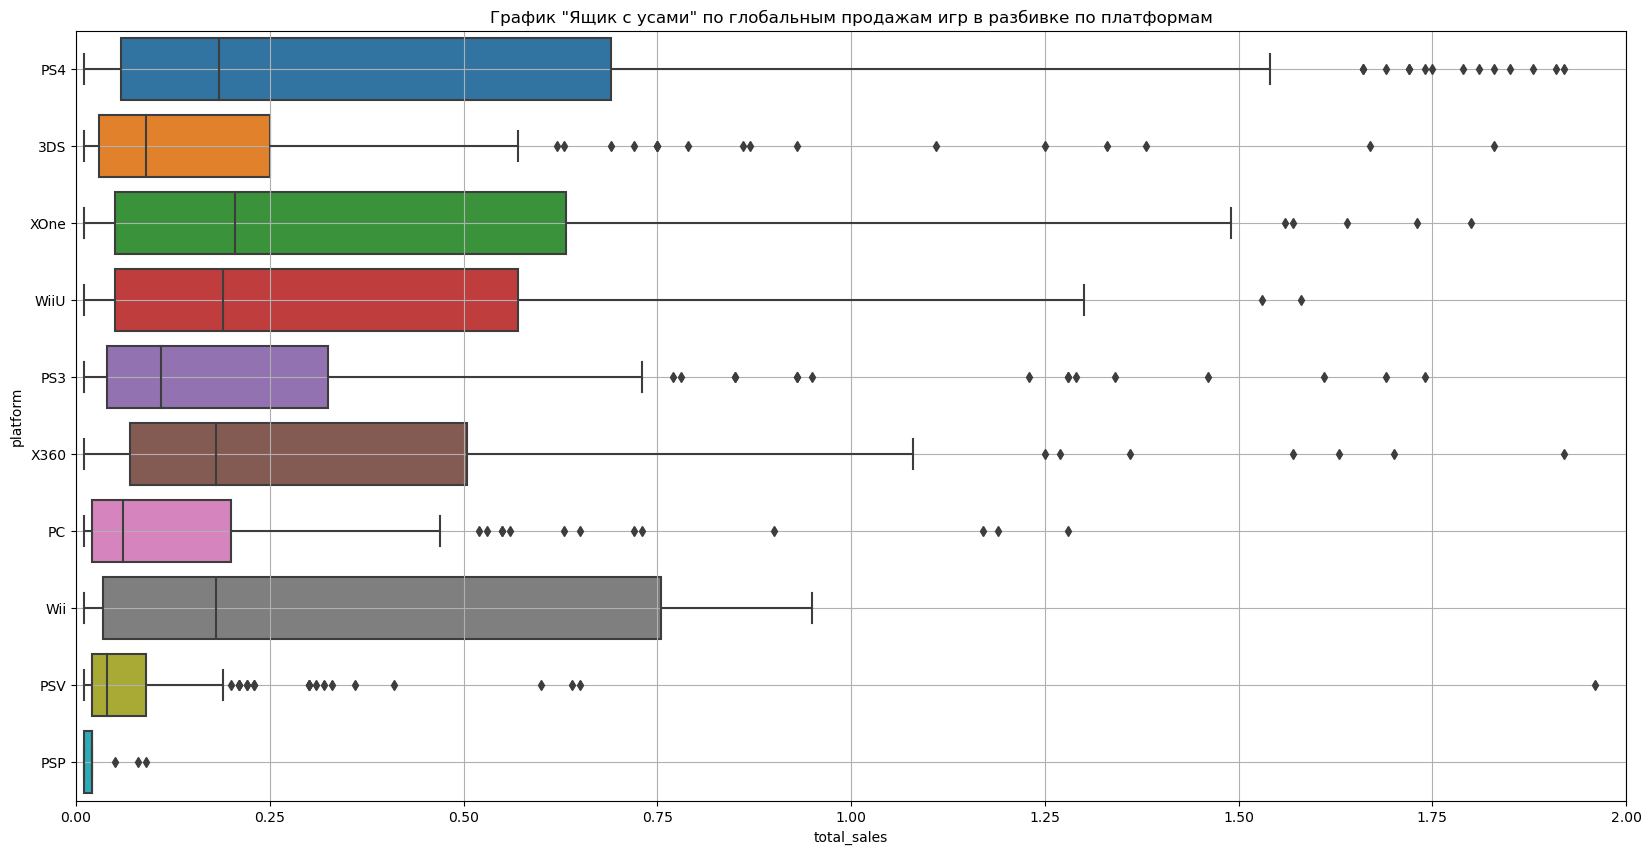

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(x="total_sales", y="platform", data= data_current.reset_index())
plt.grid(True)
plt.title('График "Ящик с усами" по глобальным продажам игр в разбивке по платформам')
plt.xlim(0,2);

Просмотрев общую диаграмму размаха мы видим частые выбросы и редкие. Данные выбросы предлагаю оставить, т.к. есть игры, которые могли «стрельнуть» большими продажами.  
  
По графику можно сказать, что большего всего продаются игры для *PS4*, *XOne*, *WIIU*. 
  
Медианные значения показывают что самые стабильные продажи у *Wii*, *PS4*, *XOne*.  
  
Средние значения показывают что лучшие показатели у *XOne*, *WIIU*, *PS4*.

### Отзывы пользователей и критиков

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.  
Сформулируйте выводы.

,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


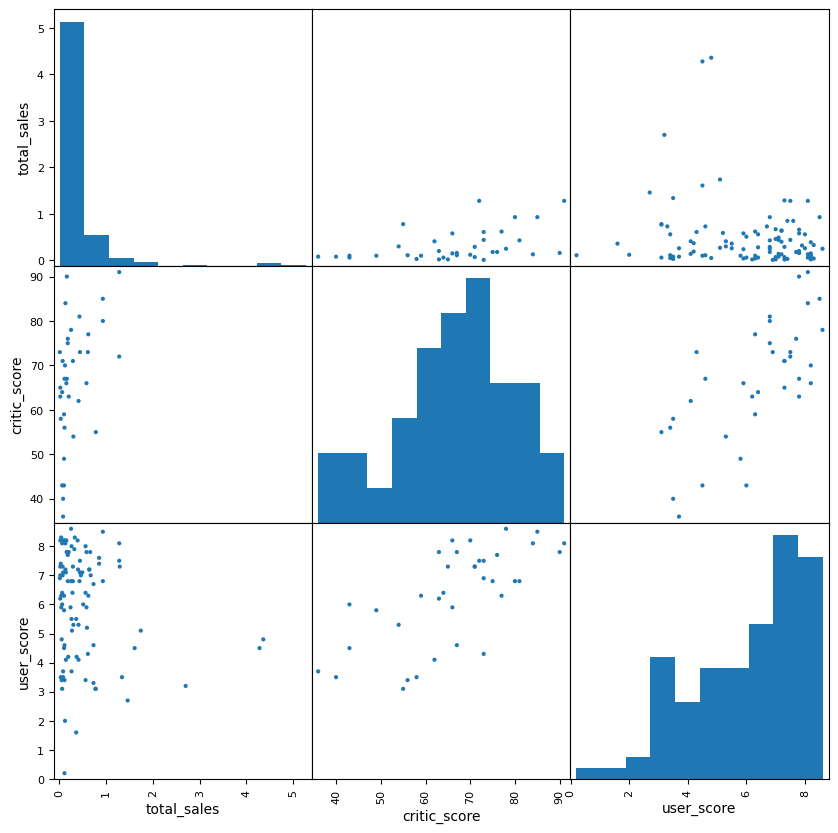

In [36]:
# PS3
data_current_ps3 = data_current[data_current['platform'] == 'PS3']
data_current_ps3 = data_current_ps3.loc[:,['total_sales', 'critic_score', 'user_score']]
display(data_current_ps3.corr())
pd.plotting.scatter_matrix(data_current_ps3, figsize=(10, 10), alpha = 1);

,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


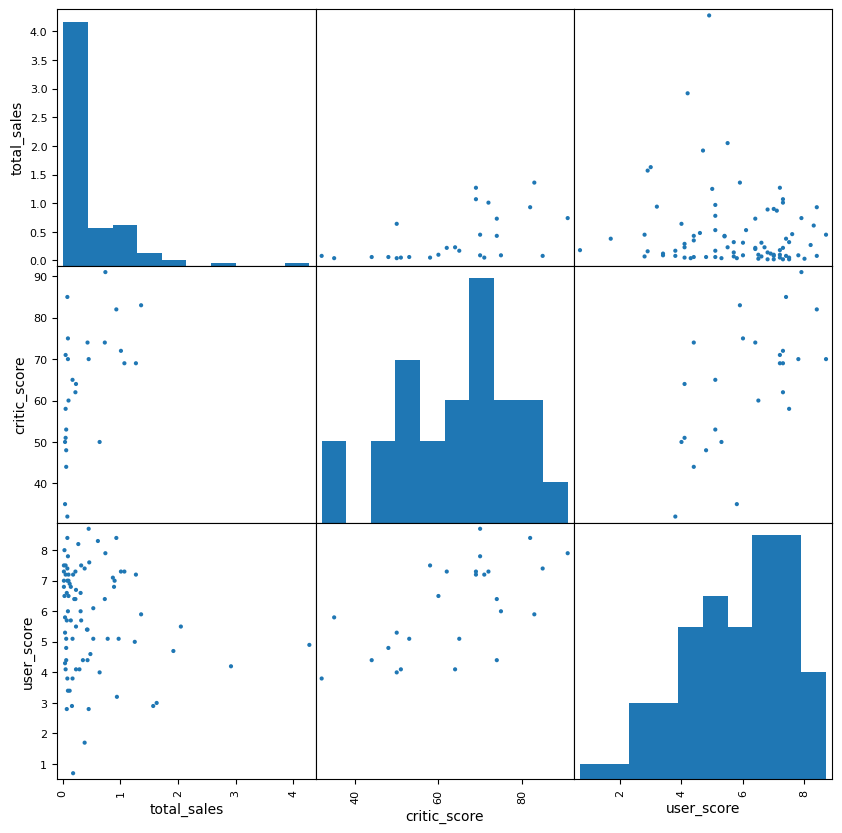

In [37]:
# X360
data_current_x360 = data_current[data_current['platform'] == 'X360']
data_current_x360 = data_current_x360.loc[:,['total_sales', 'critic_score', 'user_score']]
display(data_current_x360.corr())
pd.plotting.scatter_matrix(data_current_x360, figsize=(10, 10), alpha = 1);

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


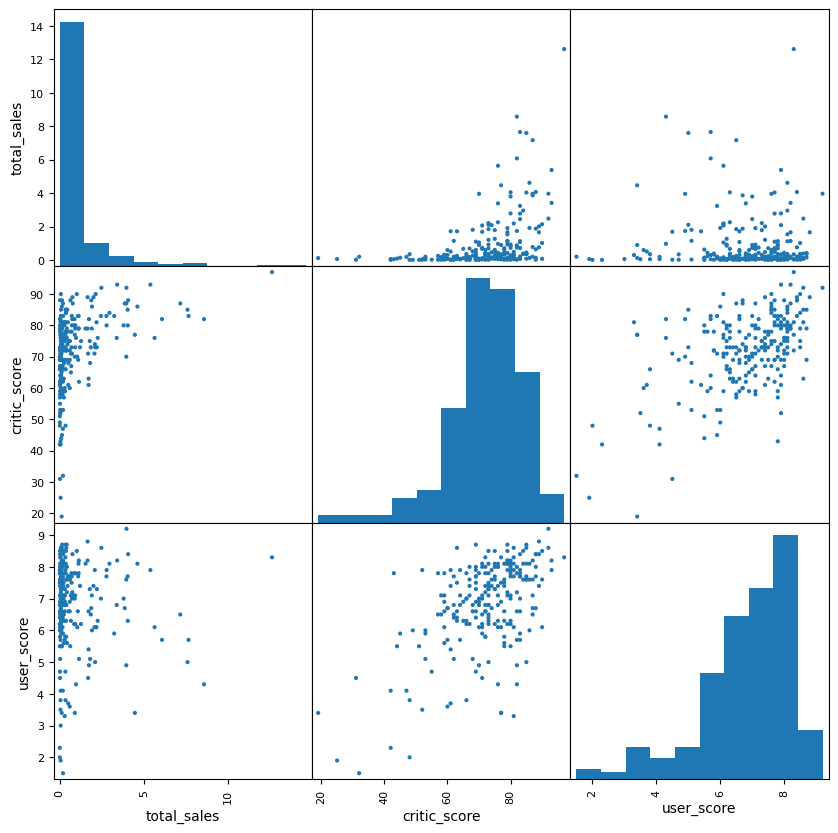

In [38]:
# PS4
data_current_ps4 = data_current[data_current['platform'] == 'PS4']
data_current_ps4 = data_current_ps4.loc[:,['total_sales', 'critic_score', 'user_score']]
display(data_current_ps4.corr())
pd.plotting.scatter_matrix(data_current_ps4, figsize=(10, 10), alpha = 1);

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


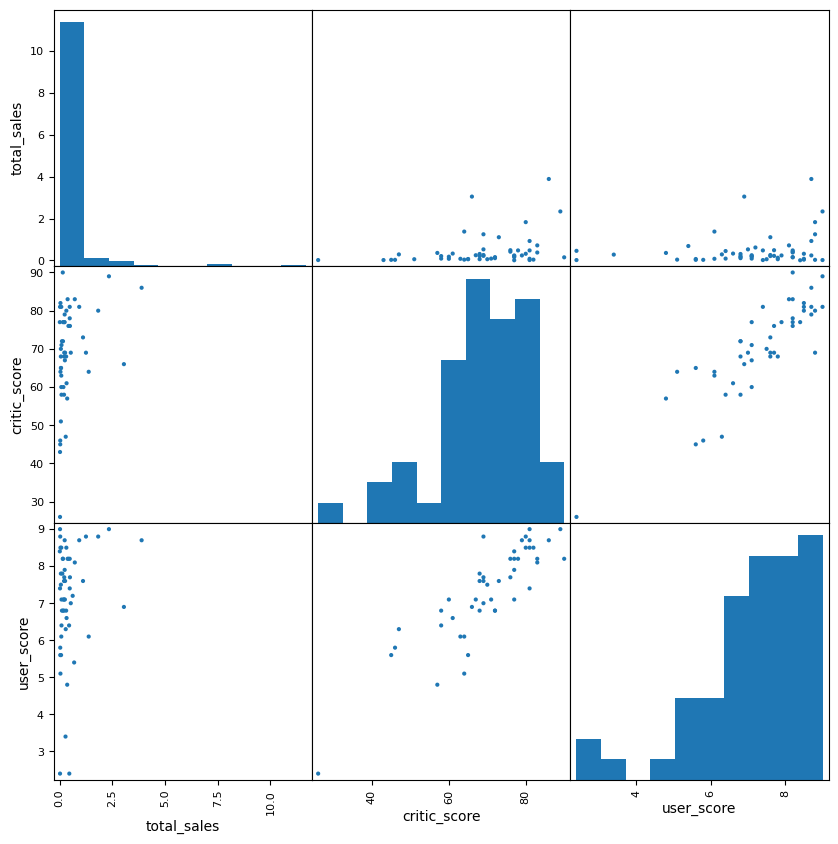

In [39]:
# 3DS
data_current_3ds = data_current[data_current['platform'] == '3DS']
data_current_3ds = data_current_3ds.loc[:,['total_sales', 'critic_score', 'user_score']]
display(data_current_3ds.corr())
pd.plotting.scatter_matrix(data_current_3ds, figsize=(10, 10), alpha = 1);

,total_sales,critic_score,user_score
total_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


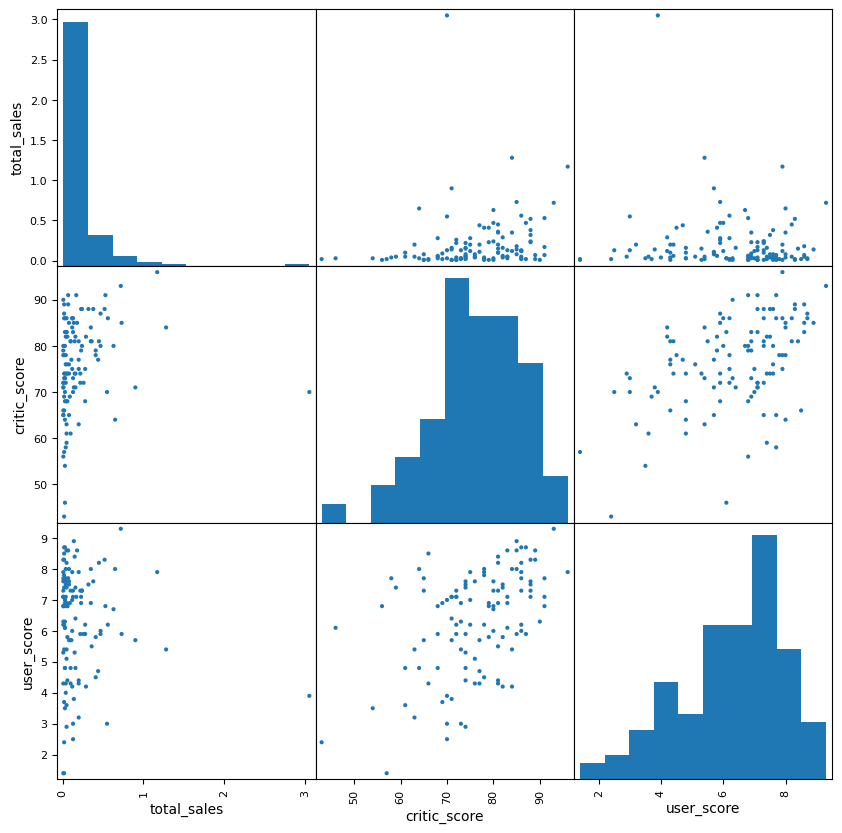

In [40]:
# PC
data_current_pc = data_current[data_current['platform'] == 'PC']
data_current_pc = data_current_pc.loc[:,['total_sales', 'critic_score', 'user_score']]
display(data_current_pc.corr())
pd.plotting.scatter_matrix(data_current_pc, figsize=(10, 10), alpha = 1);

**ВЫВОД**  
  
Чем выше оценка критиков и пользователей тем больше продажи.  
Оценки критиков и пользователей в большинстве случаев схожи.  
По всем проверенным платформам продажи растут у тех игр, у которых оценка критиков и пользователей выше.  
Оценки критиков и пользователей имеют линейную зависимость, то есть в большинстве случаев они схожи.  
Явный рост продаж у тех игр у которых оценка критиков выше 50 и оценка пользователей выше 4.

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [41]:
# Посмотрим продажи по жанрам "median"
data_current_genre = pd.pivot_table(data_current, index='genre', values='total_sales', aggfunc = {'total_sales': ['sum', 'median']})
display(data_current_genre.sort_values('median', ascending=False))

,median,sum
genre,,
Shooter,0.515,170.94
Sports,0.180,109.48
Platform,0.140,18.09
Fighting,0.125,28.22
Role-Playing,0.110,101.44
Simulation,0.100,13.13
Action,0.090,199.36
Misc,0.090,37.55
Racing,0.090,27.52


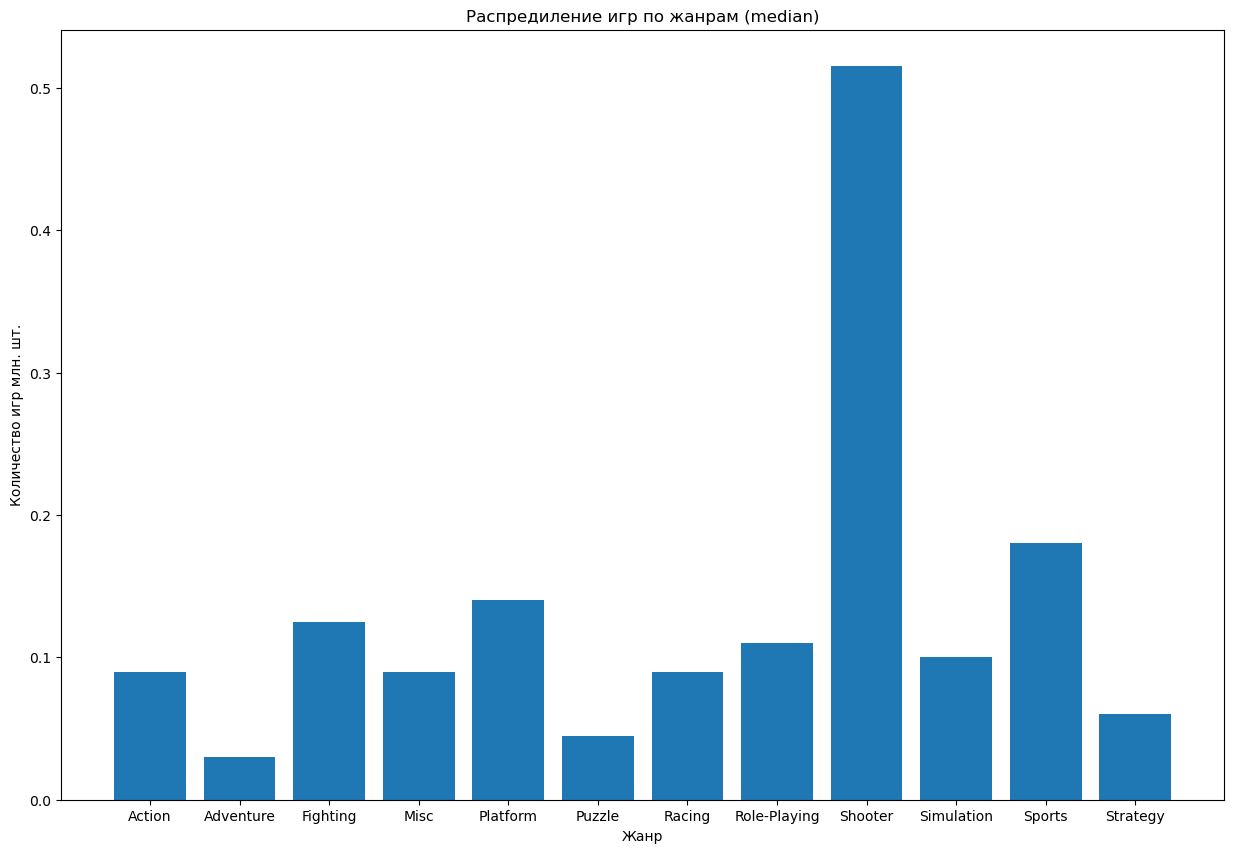

In [42]:
# Построим график "median"
plt.figure(figsize=(15,10))
plt.bar(data_current_genre.index, data_current_genre['median'])
plt.title('Распредиление игр по жанрам (median)')
plt.xlabel("Жанр");
plt.ylabel("Количество игр млн. шт.");

In [43]:
# Посмотрим продажи по жанрам "sum"
data_current_genre = pd.pivot_table(data_current, index='genre', values='total_sales', aggfunc = {'total_sales': ['sum', 'median']})
display(data_current_genre.sort_values('sum', ascending=False))

,median,sum
genre,,
Action,0.090,199.36
Shooter,0.515,170.94
Sports,0.180,109.48
Role-Playing,0.110,101.44
Misc,0.090,37.55
Fighting,0.125,28.22
Racing,0.090,27.52
Platform,0.140,18.09
Adventure,0.030,17.55


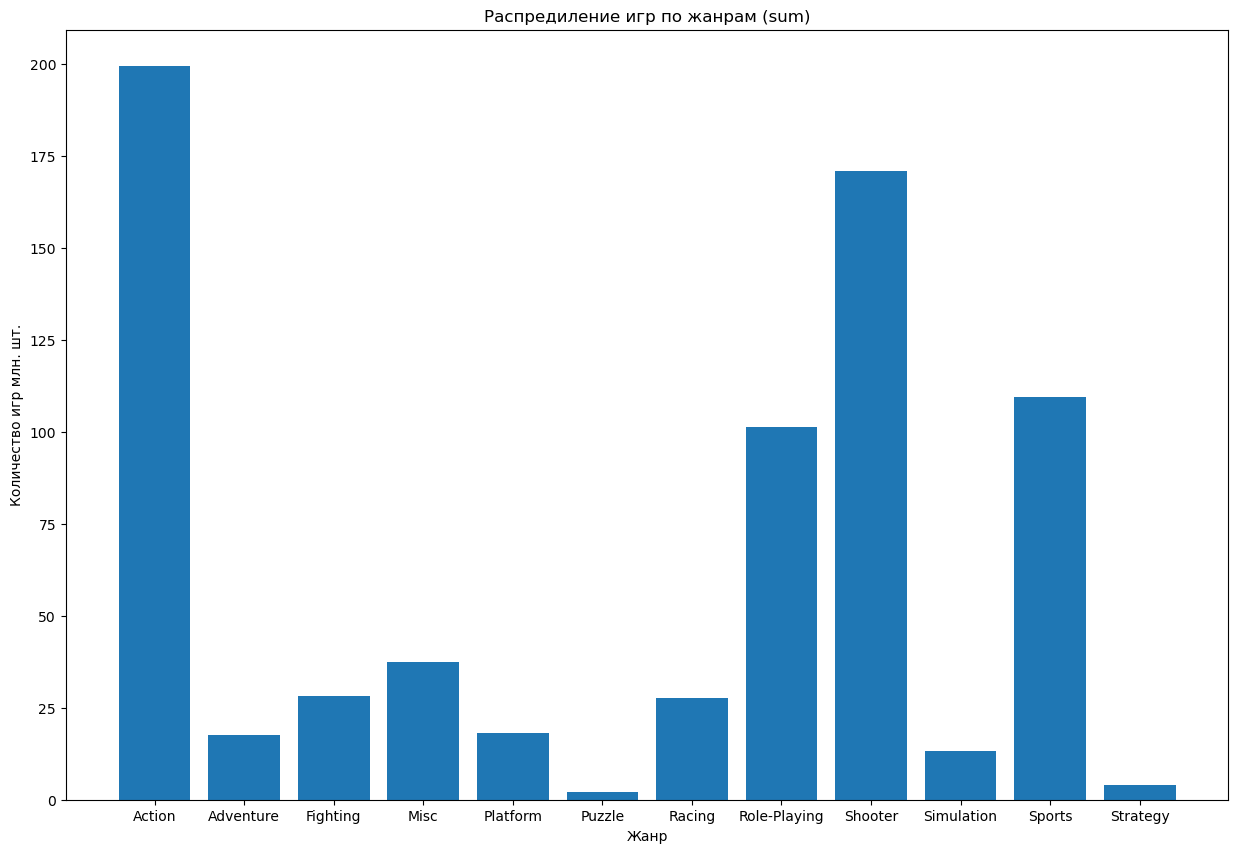

In [44]:
# Построим график "sum"
plt.figure(figsize=(15,10))
plt.bar(data_current_genre.index, data_current_genre['sum'])
plt.title('Распредиление игр по жанрам (sum)')
plt.xlabel("Жанр");
plt.ylabel("Количество игр млн. шт.");

**Вывод**  
  
Самые популярные жанры *Action* (199.36) и *Shooter* (170.94), за ними следуют *Sports* (109.48) и *Role-Playing* (101.44). В самом низу рейтинга оказались жанры *Strategy* (3.96) и *Puzzle* (2.21).  
  
Но судя по медианным значениям самые высокие и стабильные продажи в жанре *Shooter* (0.515), они опережают ближайший жанр почти в 2,5 раза *Sports* (0.180). В конце списка оказались жанры *Puzzle* (0.045) и *Adventure* (0.030).  
  
Если подвести итог то самыми прибыльными жанрами являются *Shooter* и *Sports*.
  
Из графика видна очень большая разница между жанрами с высокими продажами и жанрами с низкими продажами.

## Портрет пользователя

Определите для пользователя каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
- Самые популярные жанры (топ-5). Поясните разницу.  
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

NA_sales — продажи в Северной Америке  
EU_sales — продажи в Европе  
JP_sales — продажи в Японии

### Популярные платформы

In [45]:
# Посмотрим список платформ NA
data_current_na = pd.pivot_table(data_current, index='platform', values='na_sales', aggfunc = 'sum')
data_current_na.sort_values('na_sales', ascending=False)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


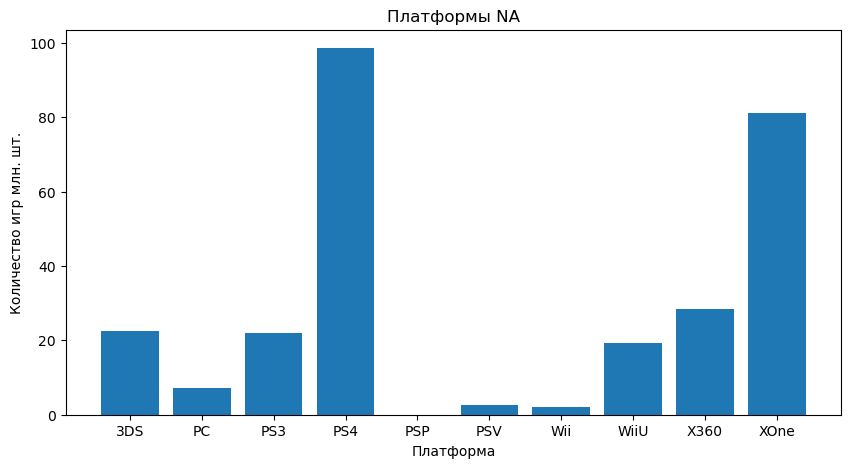

In [46]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_na.index, data_current_na['na_sales'])
plt.title('Платформы NA')
plt.xlabel("Платформа");
plt.ylabel("Количество игр млн. шт.");

In [47]:
# Посмотрим список платформ EU
data_current_eu = pd.pivot_table(data_current, index='platform', values='eu_sales', aggfunc = 'sum')
data_current_eu.sort_values('eu_sales', ascending=False)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


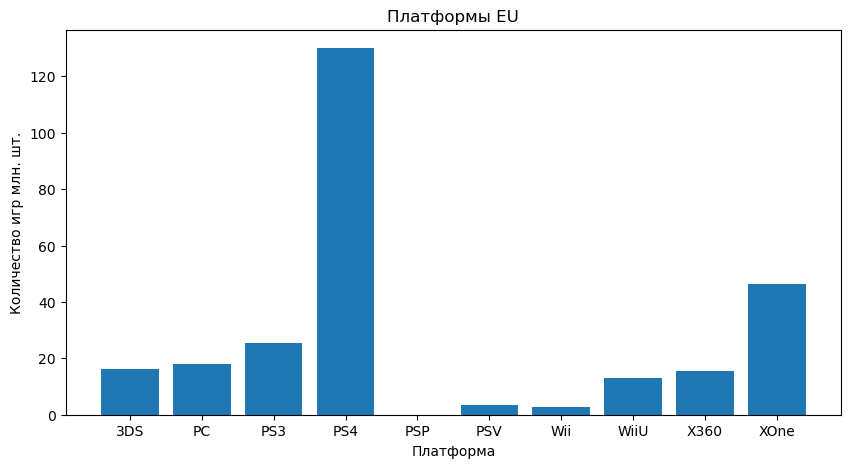

In [48]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_eu.index, data_current_eu['eu_sales'])
plt.title('Платформы EU')
plt.xlabel("Платформа");
plt.ylabel("Количество игр млн. шт.");

In [49]:
# Посмотрим список платформ JP
data_current_jp = pd.pivot_table(data_current, index='platform', values='jp_sales', aggfunc = 'sum')
data_current_jp.sort_values('jp_sales', ascending=False)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


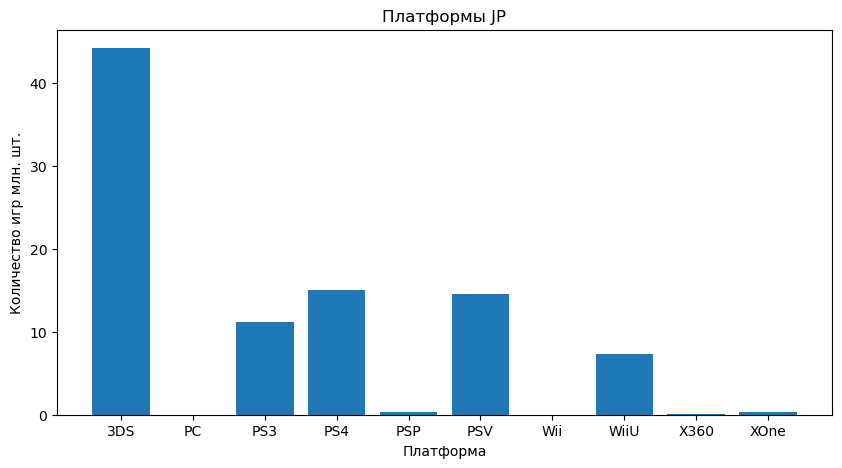

In [50]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_jp.index, data_current_jp['jp_sales'])
plt.title('Платформы JP')
plt.xlabel("Платформа");
plt.ylabel("Количество игр млн. шт.");

Платформа *PS4* является лидером продаж в Европе (130.04) и Северной Америке (98.61), но в Японии она занимает второе место (15.02). Возможно это связанно с популярностью игр в этих регионах выходивших в данный периуд на этих платформах.  
Платформа *3DS* является лидером продаж в Японии (44.24), но в Северной Америке занимает 4-е место (22.64), а в Европе только 5-е (16.12).  
Платформа *XOne* занимает 2-е место в Северной Америке (81.27) и Европе (46.25), в Японии не попадает в топ 5 платформ.  
Платформа *X360* занимает 3-е место в Северной Америке (28.30), в Европе и в Японии не вошла в топ 5.   
Платформа *PSV* занимает 3-е место в Японии (14.54), в Европе и северной Америке не входит в топ 5.  
Платформа *PS3* занимает 3-е место в Европе (25.54), 4-е место в Японии (11.22) и 5-е место в Северной Америке (22.05).  
Платформа *PC* занимает 4-е место в Европе (17.97), в Северной Америке и Японии не входит в топ 5.  
Платформа *WiiU* занимает 5-е место Японии (7.31), в Северной Америке и Европе не входит в топ 5.  
Возможно такие результаты связанны с популярностью игр в этих регионах выходивших в данный периуд на этих платформах.

### Популярные жанры

In [51]:
# Посмотрим список жанров NA
data_current_na = pd.pivot_table(data_current, index='genre', values='na_sales', aggfunc = 'sum')
data_current_na.sort_values('na_sales', ascending=False)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


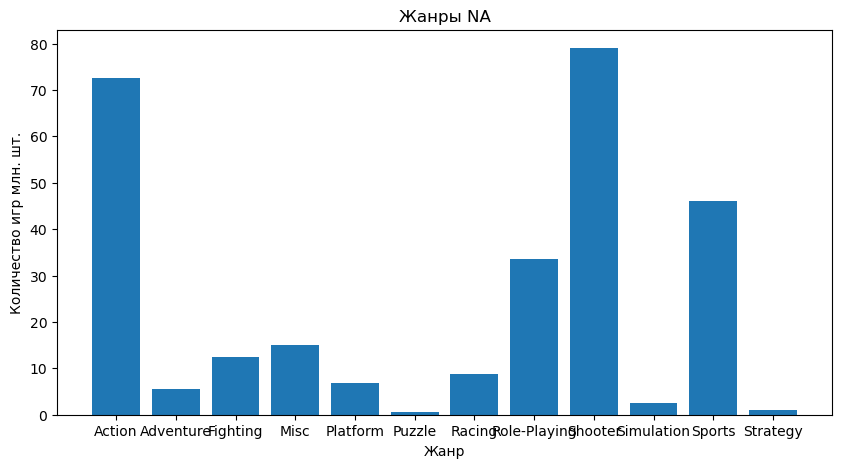

In [52]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_na.index, data_current_na['na_sales'])
plt.title('Жанры NA')
plt.xlabel("Жанр");
plt.ylabel("Количество игр млн. шт.");

In [53]:
# Посмотрим список жанров EU
data_current_eu = pd.pivot_table(data_current, index='genre', values='eu_sales', aggfunc = 'sum')
data_current_eu.sort_values('eu_sales', ascending=False)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


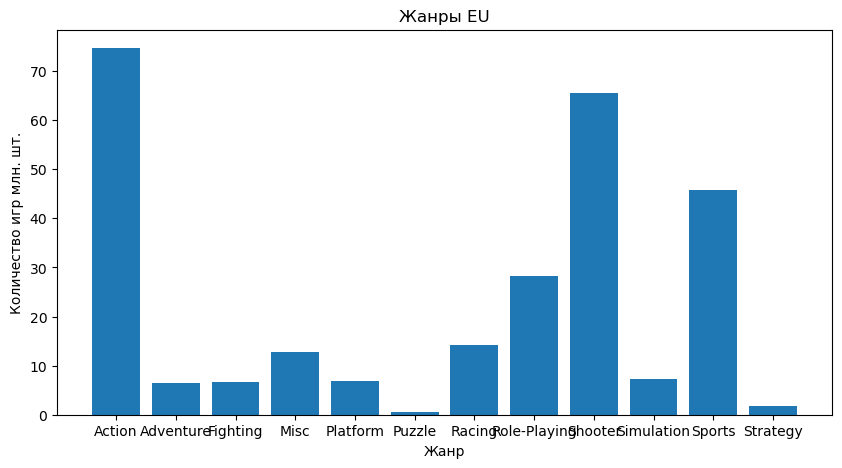

In [54]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_eu.index, data_current_eu['eu_sales'])
plt.title('Жанры EU')
plt.xlabel("Жанр");
plt.ylabel("Количество игр млн. шт.");

In [55]:
# Посмотрим список жанры JP
data_current_jp = pd.pivot_table(data_current, index='genre', values='jp_sales', aggfunc = 'sum')
data_current_jp.sort_values('jp_sales', ascending=False)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


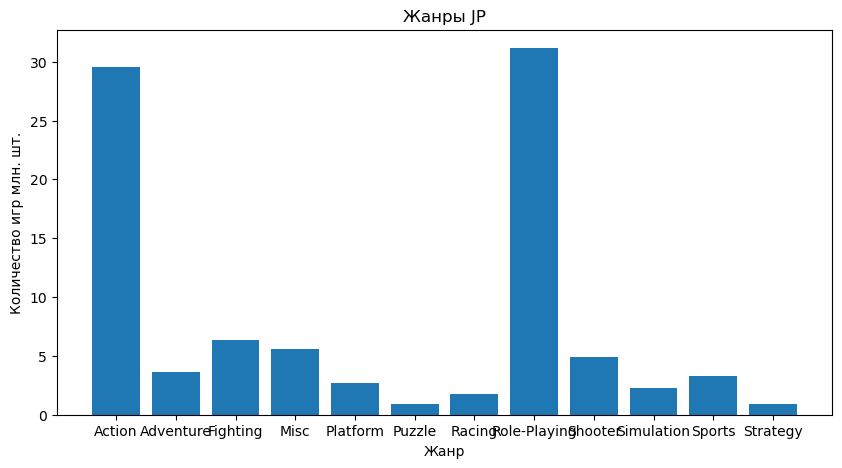

In [56]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_jp.index, data_current_jp['jp_sales'])
plt.title('Жанры JP')
plt.xlabel("Жанр");
plt.ylabel("Количество игр млн. шт.");

Жанр *Shooter* самый популярный в Северной Америке (79.02), в Европе он на 2-ом месте (65.52), в Японии на 5-ом (4.87).  
Жанр *Action* популярен в Европе (74.68), в Северной Америке (72.53) и Японии (29.58) он занимает 2-е место.  
Жанр *Role-Playing* популярен в Японии (31.16), в Северной Америке (33.47) и Европе (28.17) он занимает 4-е место.  
Жанр *Sports* занимает 3-е место в Северной Америке (46.13) и Европе (45.73), в Японии он не входит в топ 5.  
Жанр *Fighting* занимает 3-е место в Японии (6.37), в Северной Америке и в Европе не входит в топ 5.  
Жанр *Misc* в Японии занимает 4-е место (5.61), в Северной Америке он занимает 5-е место (15.05), в Европе не входит в топ 5.  
Жанр *Racing* в Европе занимает 5-е место (14.13), в Северной Америке и Японии не входит в топ 5.  
Возможно всё зависит от предпочтения и колличества разновидностей игр в данных жанрах у пользователей живущих в данных регионах.

### Рейтинг ESRB

**Е**  
Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.  
  
**Т**  
Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.  
  
**М**  
Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.  
  
Источник: https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi?ysclid=llgsry5qo720693831

In [57]:
# Посмотрим список рейтинга NA
data_current_na = pd.pivot_table(data_current, index='rating', values='na_sales', aggfunc = 'sum')
data_current_na.sort_values('na_sales', ascending=False)

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


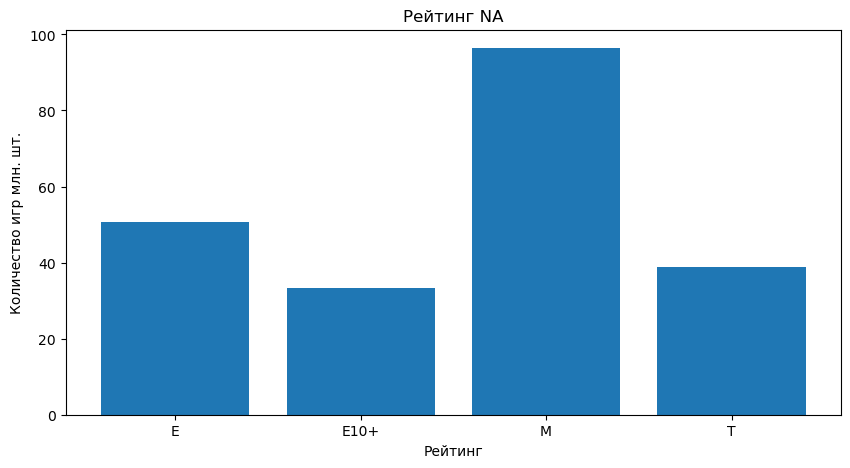

In [58]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_na.index, data_current_na['na_sales'])
plt.title('Рейтинг NA')
plt.xlabel("Рейтинг");
plt.ylabel("Количество игр млн. шт.");

In [59]:
# Посмотрим список рейтинга EU
data_current_eu = pd.pivot_table(data_current, index='rating', values='eu_sales', aggfunc = 'sum')
data_current_eu.sort_values('eu_sales', ascending=False)

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


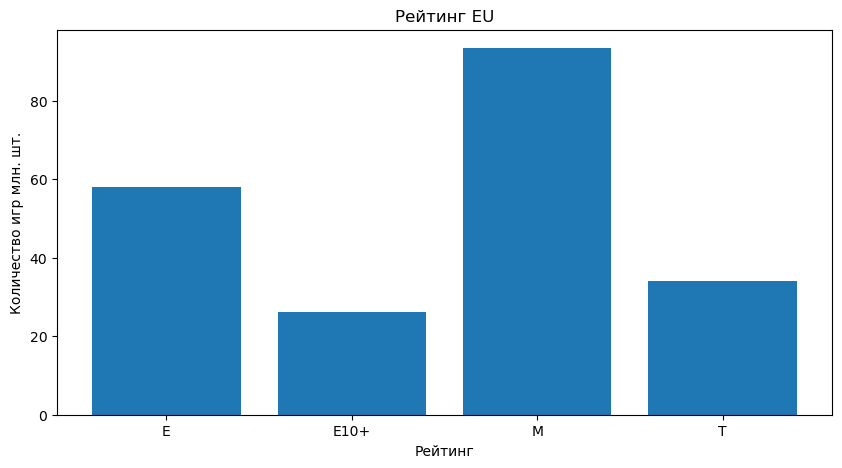

In [60]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_eu.index, data_current_eu['eu_sales'])
plt.title('Рейтинг EU')
plt.xlabel("Рейтинг");
plt.ylabel("Количество игр млн. шт.");

In [61]:
# Посмотрим список рейтинга JP
data_current_jp = pd.pivot_table(data_current, index='rating', values='jp_sales', aggfunc = 'sum')
data_current_jp.sort_values('jp_sales', ascending=False)

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


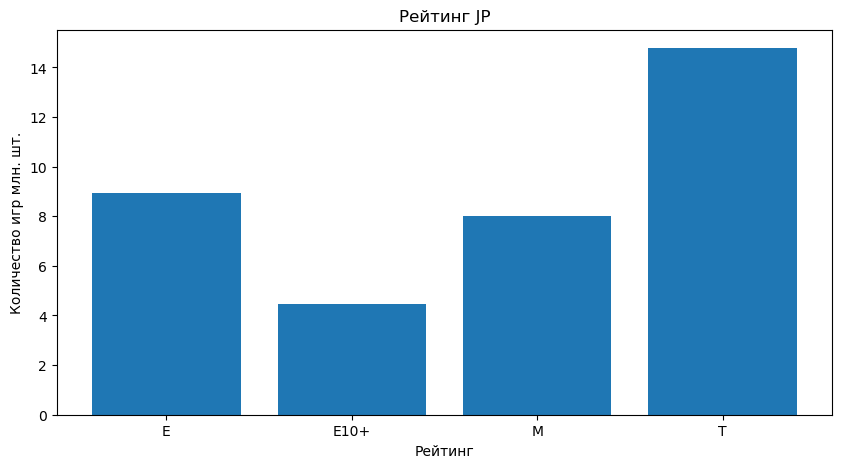

In [62]:
# Построим график
plt.figure(figsize=(10,5))
plt.bar(data_current_jp.index, data_current_jp['jp_sales'])
plt.title('Рейтинг JP')
plt.xlabel("Рейтинг");
plt.ylabel("Количество игр млн. шт.");

На продажи в Северной Америке и Европе влияет рейтинг **М**, а в Японии **Т**.

**Вывод**:  
  
Исходя из полученных данных можно сказать, что геймеры по всему миру, кроме Японии предпочитают играть на *PS4* в *Action* или *Shooter* с рейтингом *М*. 
  
Отличается только Япония, там геймеры играют на *3DS* в *RPG* или *Action* с рейтингом *T*.

## Гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Задайте самостоятельно пороговое значение alpha.  
Поясните:  
Как вы сформулировали нулевую и альтернативную гипотезы;  
Какой критерий применили для проверки гипотез и почему.

### Гпотеза 1

Проверка статистических данных пользователей Xbox One и PC.

In [63]:
# Xbox One
user_xone = data_current.query('platform == "XOne"')
user_xone = user_xone[user_xone['user_score'].notna()]
user_xone['user_score'].describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [64]:
# PC
user_pc = data_current.query('platform == "PC"')
user_pc = user_pc[user_pc['user_score'].notna()]
user_pc['user_score'].describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Средние значения довольно близки.

Проверка гипотезы. Будет использован тест Стюдента.

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны.  
Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Коэффициент alpha будет равен 0.01.

In [65]:
alpha = 0.01

results = st.ttest_ind(user_xone['user_score'], user_pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Гипотеза о том, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые - подтвердилась. Это означает, что пользователи ставят примерно одинаковые оценки играм на плаформах *PC* и *Xbox One*.

### Гипотеза 2

Проверка статистических данных по жанрам Action и Sports.

In [66]:
user_action = data_current.query('genre == "Action"')
user_action = user_action[user_action['user_score'].notna()]
user_action['user_score'].describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [67]:
user_sports = data_current.query('genre == "Sports"')
user_sports = user_sports[user_sports['user_score'].notna()]
user_sports['user_score'].describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

Средние значения отличаются.

Проверка гипотезы. Будет использован тест Стюдента.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны.  
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны.

Коэффициент alpha будет равен 0.01.

In [68]:
alpha = 0.01

results = st.ttest_ind(user_action['user_score'], user_sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Гипотеза о том, что средние пользовательские рейтинги жанров *Action* и *Sports* разные - не подтвердилась. Средние этих выборок различаются. Это говорит о том, что пользователи ставят разные оценки играм с жанрами *Action* и *Sports*.

## Общий вывод

В ходе исследования данных была проделана большая работа.  
Изучена предоставленная таблица с данными, выявлены и обработаны пропуски.  
Названия столбцов приведен к нижнему регистру, тип данных заменен.  
Обработаны аномалии, те, что не пригодились удалены приблизительно 1,6 % данных, что не критично.  
Были даны ответы на поставленные вопросы, комментарии даны по ходу исследования.

Самая прибыльная консоль *PS4*, так же она является самой популярной у пользователей всего мира, кроме Японии. Самый популрный жанр *Action* с рейтингом *М*, и в *RPG* и *Action* с рейтингом *T* в Японии.  
Было выявлено, что продажи игр зависят от платформы, жанра, а также рейтинга критиков и оценки пользователей.

Рекоммендации для кампании на 2017 год.

Считаю надо сделать ставку на консоли нового поколения в зависимости от популрянх консолей в регионе.  
Такая же ситуация с жанром и по возростному рейтингу.  
Судя по популярности рейтинга M - основная часть геймеров старше 17 лет.  
Также стоит учитывать рейтинг критиков на вышедшую игру, чем он выше тем больше будут продажи.

Стоит учесть, что в конце актуального периода продажи игр падали по всем платформам, вероятно выручка в 2017 году будет меньше чем в 2016 пока не появятся консоли нового поколения,т.к. после выхода новых консолей резко начинают расти продажи игр.  
При появлении информации о сроках выхода новых консолей заранее заключать договора на поставку игр в магазин.  
Можно отметить, что стиабильными являются продажи игр на платформе PC.